In [5]:
!pip install prophet
!pip install pmdarima

In [6]:
#let's get all the libraries in place

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import prophet
from datetime import datetime
from tqdm import tqdm

In [7]:
#Import Data
df = pd.read_excel('AirQualityUCI.xlsx')
print(df.head())
print(df.info())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

In [8]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Combine 'Date' and 'Time' columns
df['Datetime'] = df.apply(lambda row: pd.Timestamp.combine(row['Date'].date(), row['Time']), axis=1)


# Preprocess
df = df.drop(['Date', 'Time'], axis=1)
df.dropna(inplace = True)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


# **Graphs and Heat Maps**

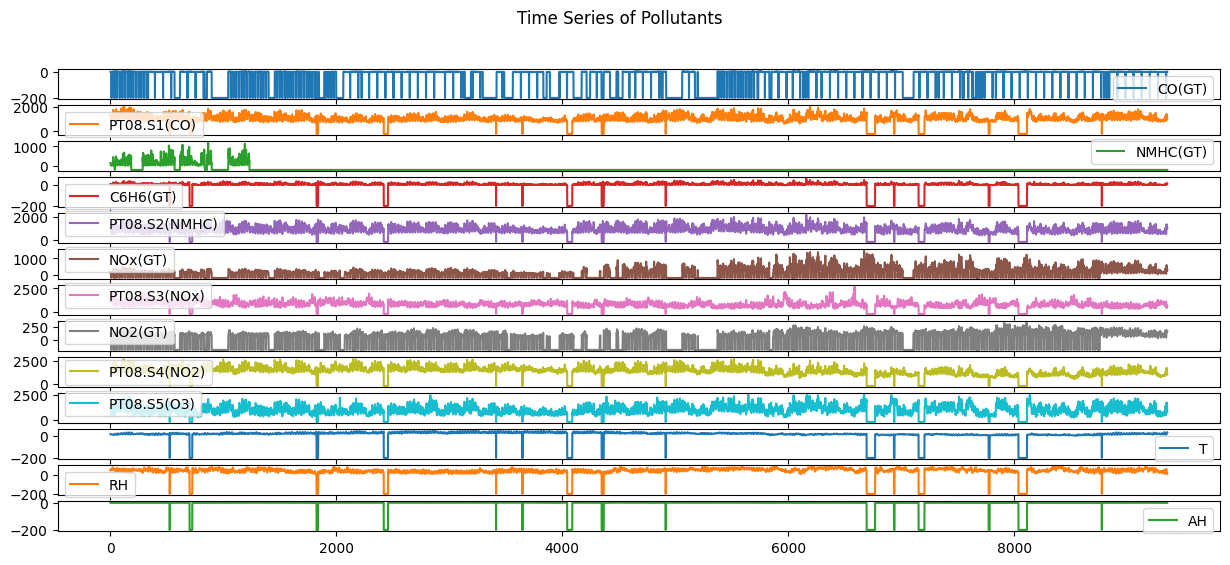

In [9]:
import matplotlib.dates as mdates
#PLot the data
pollutants = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
df[pollutants].plot(figsize = (15, 6), subplots = True, title = "Time Series of Pollutants")
plt.show()

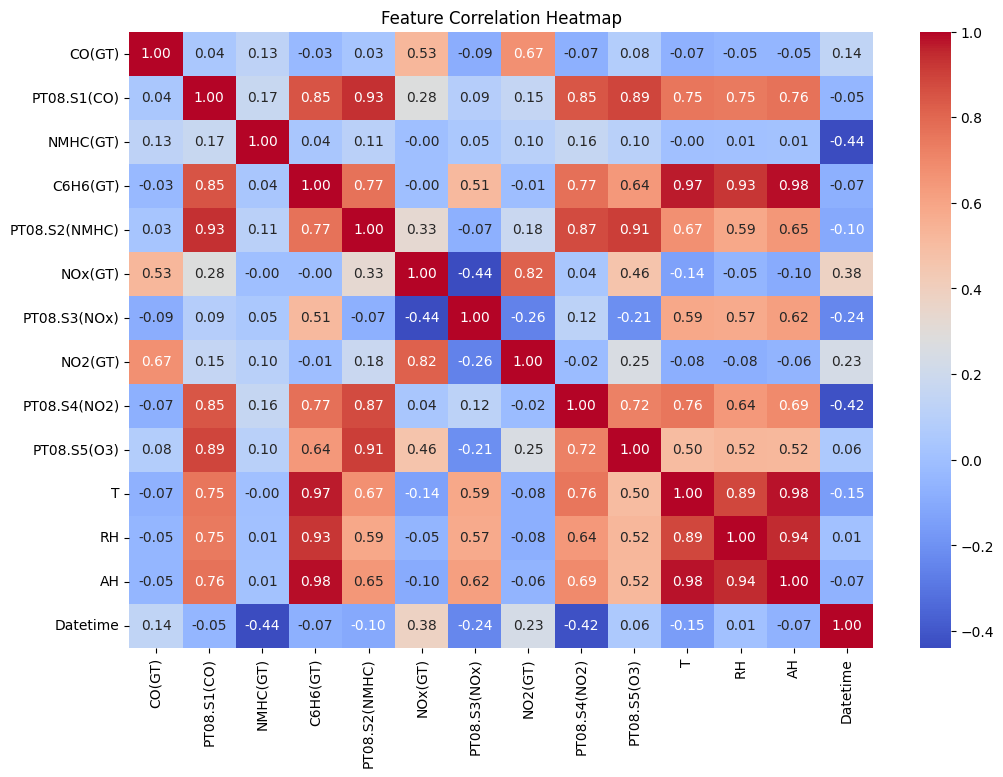

In [10]:
# Check correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## **Hourly trend and Seasonal breakdown for the attributes**

<ipython-input-12-8bdac968c783>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='CO(GT)', ci=None)


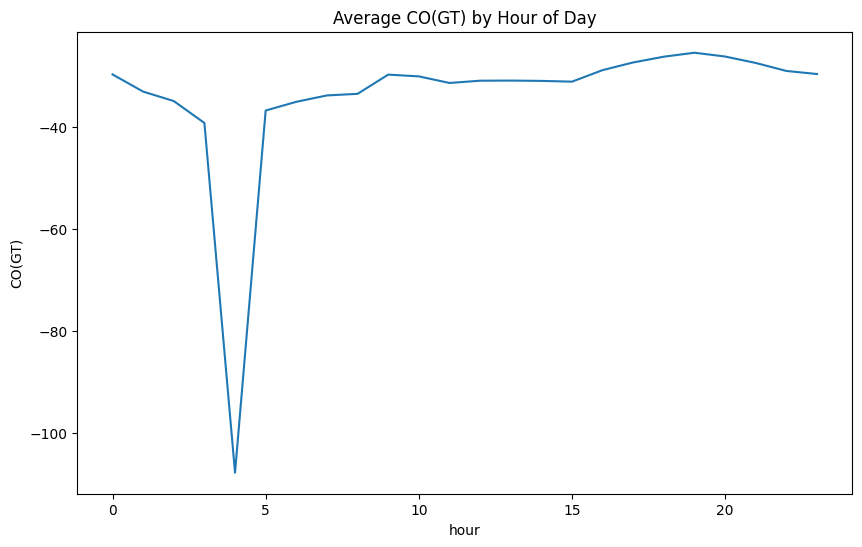

In [12]:
#hourly trend of CO(GT) in a day
df = df.set_index('Datetime')
df['hour'] = df.index.hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='CO(GT)', ci=None)
plt.title("Average CO(GT) by Hour of Day") # Update title to reflect actual column name
plt.show()

In [13]:
#Decomposition of seasonal data for CO(GT) for a period of 48 hours
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['CO(GT)'], model='additive', period=48)
plt.suptitle("Seasonal Decomposition of CO(GT)", fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

<ipython-input-14-5507813056c2>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='NMHC(GT)', ci=None)


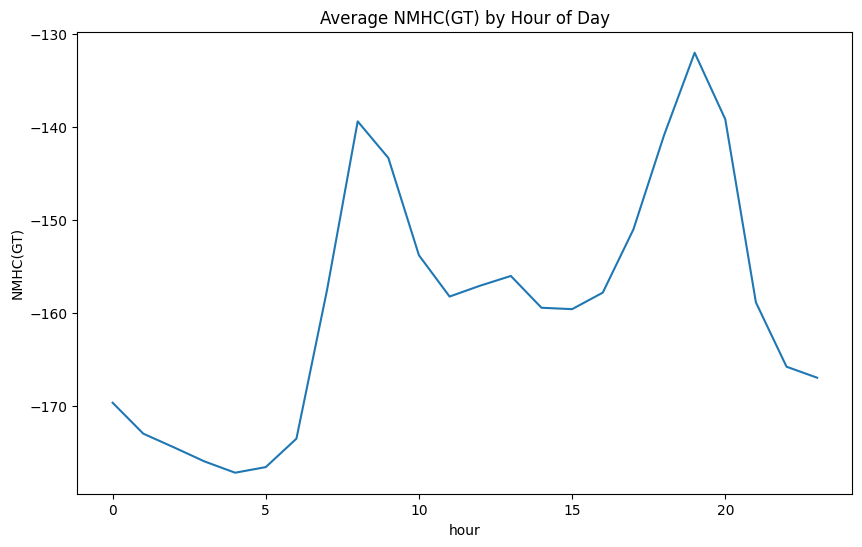

In [14]:
#hourly trend of NMHC(GT) in a day
df['hour'] = df.index.hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='NMHC(GT)', ci=None)
plt.title("Average NMHC(GT) by Hour of Day") # Update title to reflect actual column name
plt.show()

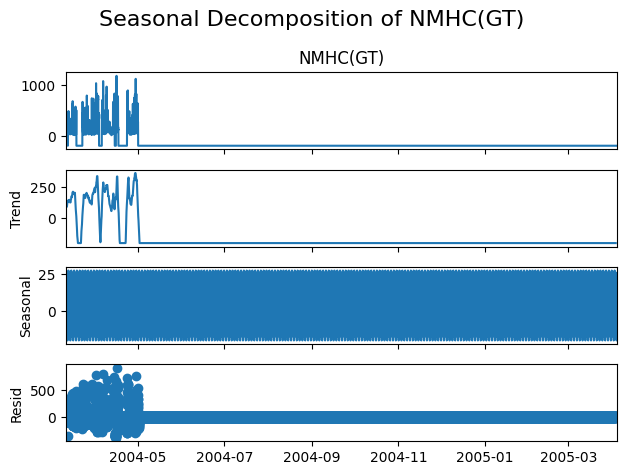

In [15]:
#Decomposition of seasonal data for NMHC(GT) for a period of 48 hours
result = seasonal_decompose(df['NMHC(GT)'], model='additive', period=48)
result.plot()
plt.suptitle("Seasonal Decomposition of NMHC(GT)", fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-16-0fa82aee421c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='C6H6(GT)', ci=None)


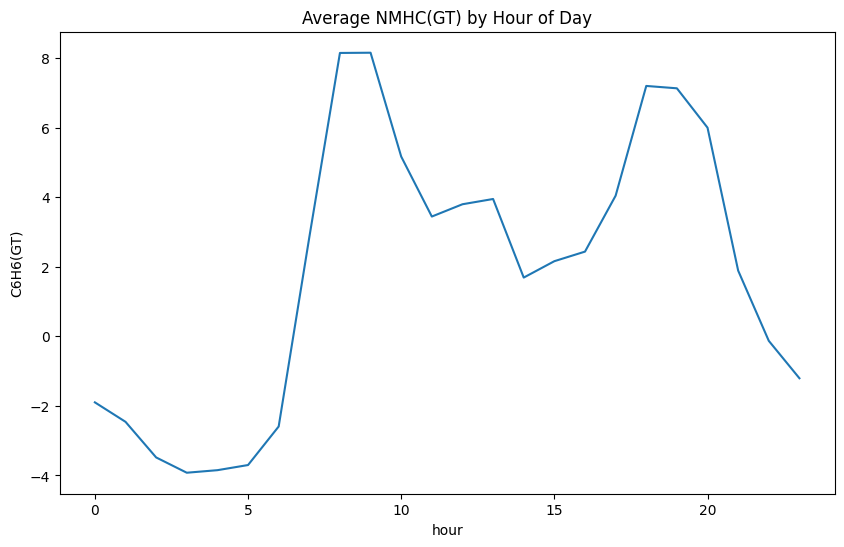

In [16]:
#hourly trend of C6H6(GT) in a day
df['hour'] = df.index.hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='C6H6(GT)', ci=None)
plt.title("Average NMHC(GT) by Hour of Day") # Update title to reflect actual column name
plt.show()

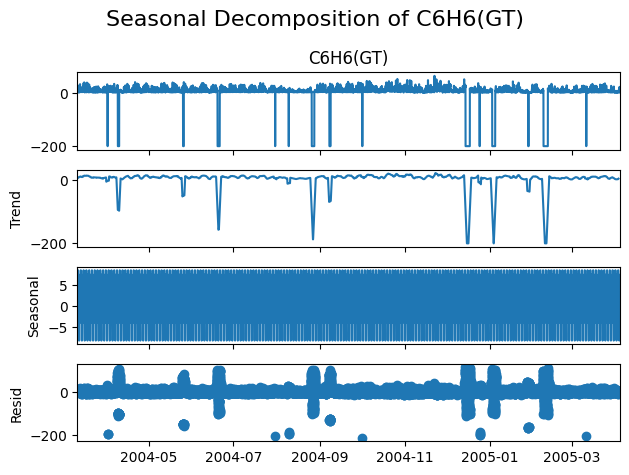

In [17]:
#Decomposition of seasonal data for C6H6C(GT) for a period of 48 hours
result = seasonal_decompose(df['C6H6(GT)'], model='additive', period=48)
result.plot()
plt.suptitle("Seasonal Decomposition of C6H6(GT)", fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-18-58d57751c164>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='NOx(GT)', ci=None)


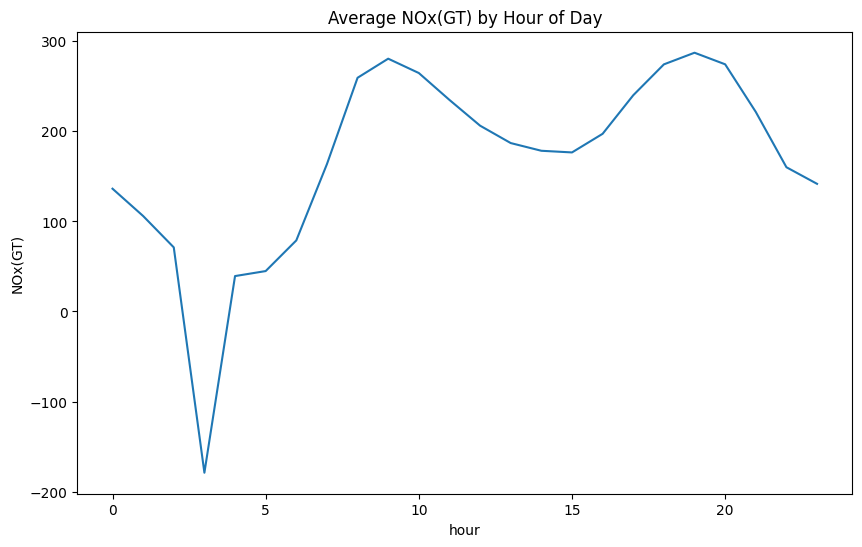

In [18]:
#hourly trend of NOx(GT) in a day
df['hour'] = df.index.hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='NOx(GT)', ci=None)
plt.title("Average NOx(GT) by Hour of Day") # Update title to reflect actual column name
plt.show()

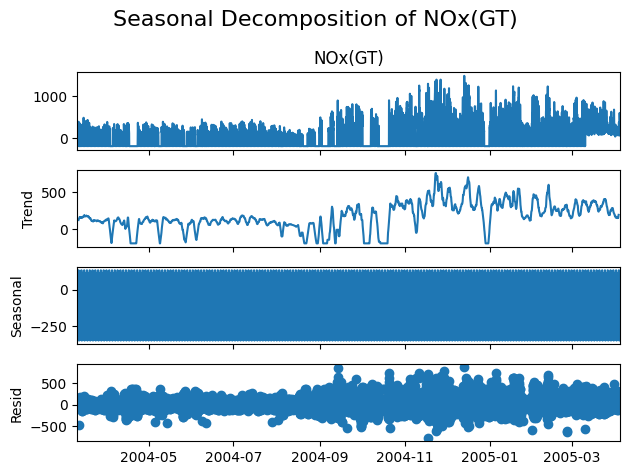

In [19]:
#Decomposition of seasonal data for NOx(GT) for a period of 48 hours
result = seasonal_decompose(df['NOx(GT)'], model='additive', period=48)
result.plot()
plt.suptitle("Seasonal Decomposition of NOx(GT)", fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-20-949fe250a9c8>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='NO2(GT)', ci=None)


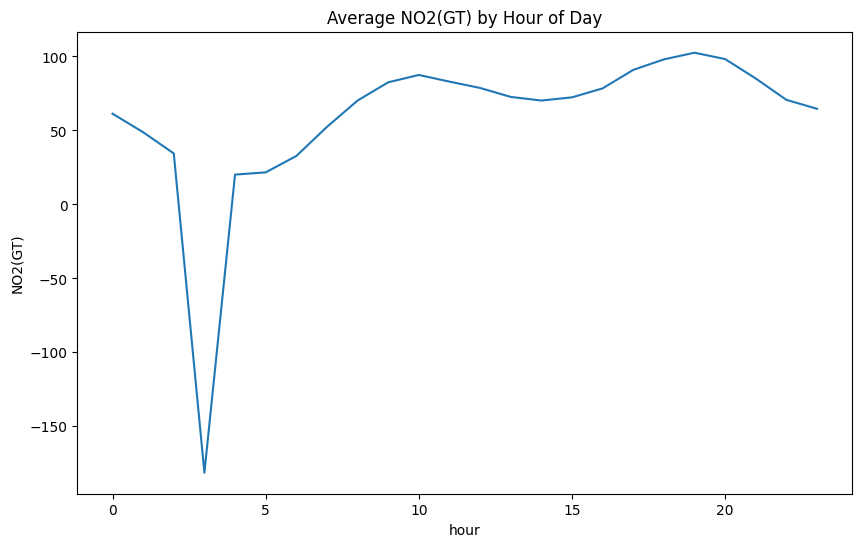

In [20]:
#hourly trend of NO2(GT) in a day
df['hour'] = df.index.hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='NO2(GT)', ci=None)
plt.title("Average NO2(GT) by Hour of Day") # Update title to reflect actual column name
plt.show()

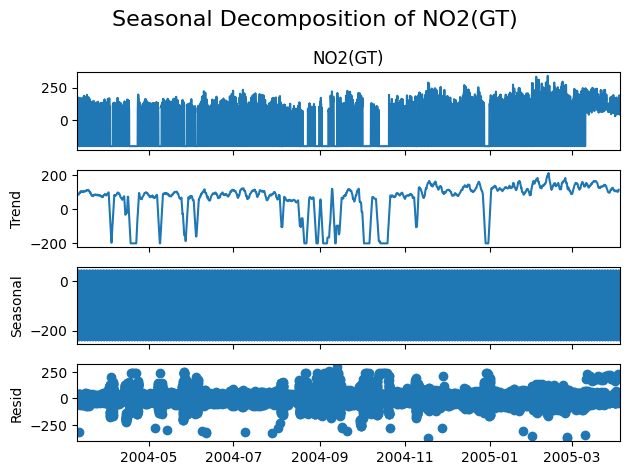

In [21]:
#Decomposition of seasonal data for NO2(GT) for a period of 48 hours
result = seasonal_decompose(df['NO2(GT)'], model='additive', period=48)
result.plot()
plt.suptitle("Seasonal Decomposition of NO2(GT)", fontsize=16)
plt.tight_layout()
plt.show()

### **Stationarity Testing**

In [22]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', 'Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out)
    print('-' * 50)

# Test stationarity for selected pollutants
for col in ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']:
    adf_test(df[col], title=col)


Augmented Dickey-Fuller Test: CO(GT)
ADF Statistic                 -9.552225e+00
p-value                        2.553762e-16
Lags Used                      2.800000e+01
Number of Observations Used    9.328000e+03
Critical Value (1%)           -3.431051e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64
--------------------------------------------------
Augmented Dickey-Fuller Test: NMHC(GT)
ADF Statistic                 -6.391014e+00
p-value                        2.105931e-08
Lags Used                      3.700000e+01
Number of Observations Used    9.319000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64
--------------------------------------------------
Augmented Dickey-Fuller Test: C6H6(GT)
ADF Statistic                 -1.103228e+01
p-value                        5.628956e-20
Lags Used                      2.500000e+01
Numbe

## ARIMA & Prophet testing



In [55]:
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error

def forecast_arima(series, order=(3, 1, 2)):
    split_index = int(len(series) * 0.9)
    train, test = series[:split_index], series[split_index:]

    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))
        rmse = root_mean_squared_error(test, forecast)
        return rmse
    except Exception as e:
        print(f"ARIMA failed for {series.name}: {e}")
        return None

def forecast_prophet(df, col):
    df_prophet = df[[col]].reset_index().rename(columns={'Datetime': 'ds', col: 'y'})
    split_index = int(len(df_prophet) * 0.9)
    train, test = df_prophet[:split_index], df_prophet[split_index:]

    try:
        model = Prophet()
        model.fit(train)
        future = model.make_future_dataframe(periods=len(test), freq='H')
        forecast = model.predict(future)
        pred = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]
        rmse = root_mean_squared_error(test['y'], pred['yhat'])
        return rmse
    except Exception as e:
        print(f"Prophet failed for {col}: {e}")
        return None


In [56]:
# Update index name for Prophet
df.index.name = 'Datetime'

features = df.columns.tolist()

arima_results = {}
prophet_results = {}

for col in features:
    print(f"Processing: {col}")
    arima_rmse = forecast_arima(df[col])
    prophet_rmse = forecast_prophet(df, col)
    arima_results[col] = arima_rmse
    prophet_results[col] = prophet_rmse


Processing: CO(GT)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppmllu4h4/g8nqxlsd.json
DEBUG:c

Processing: PT08.S1(CO)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Processing: NMHC(GT)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Processing: C6H6(GT)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Processing: PT08.S2(NMHC)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Processing: NOx(GT)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Processing: PT08.S3(NOx)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppmllu4h4/sj7s2mcc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppmllu4h4/scjztt2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/pr

Processing: NO2(GT)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Processing: PT08.S4(NO2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Processing: PT08.S5(O3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Processing: T


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Processing: RH


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Processing: AH


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Processing: hour


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [58]:
comparison_df = pd.DataFrame({
    'ARIMA_RMSE': arima_results,
    'Prophet_RMSE': prophet_results
}).T

print("Model Comparison (RMSE):")
display(comparison_df)


Model Comparison (RMSE):


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour
ARIMA_RMSE,31.317661,204.504219,8.519931e-14,14.622127,252.796661,192.072241,229.082005,78.068772,282.716246,424.598761,21.779170,21.116589,12.778585,6.899071
Prophet_RMSE,30.742603,241.149595,1.971053e+01,25.556136,254.389510,157.712185,190.284590,62.819259,402.607548,405.930307,33.719942,34.216385,23.296835,2.385500


## **Next 48 hours forecast**

In [53]:
def forecast_48_arima_all(df, features):
    arima_preds = pd.DataFrame(index=future_index)

    for col in tqdm(features, desc="ARIMA Forecasting"):
        try:
            model = ARIMA(df[col], order=(3, 1, 2))
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=48)
            arima_preds[col] = forecast.values
        except Exception as e:
            print(f"ARIMA failed for {col}: {e}")
            arima_preds[col] = np.nan
    return arima_preds


In [54]:
# Define target features
target_features = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
    'T', 'RH', 'AH'
]

# Run forecasts
arima_forecasts = forecast_48_arima_all(df, target_features)
print("\nARIMA Forecast for next 48 hours:\n", arima_forecasts.head())

ARIMA Forecasting:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
ARIMA Forecasting:   8%|▊         | 1/13 [00:11<02:14, 11.19s/it]/usr/local/lib/python3.11/dist-packages/statsmodel


ARIMA Forecast for next 48 hours:
                        CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
2005-04-04 15:00:00  1.736271  1077.940993    -200.0  11.246376   
2005-04-04 16:00:00  1.603221  1084.116801    -200.0  10.786294   
2005-04-04 17:00:00  1.493371  1084.499857    -200.0  10.389962   
2005-04-04 18:00:00  1.398149  1083.982418    -200.0   9.948818   
2005-04-04 19:00:00  1.308769  1083.069208    -200.0   9.587104   

                     PT08.S2(NMHC)     NOx(GT)  PT08.S3(NOx)     NO2(GT)  \
2005-04-04 15:00:00    1023.148756  252.165781    662.644379  155.307095   
2005-04-04 16:00:00     982.077996  246.370745    675.173477  150.963176   
2005-04-04 17:00:00     940.595435  236.729246    691.446347  147.436188   
2005-04-04 18:00:00     908.121540  234.151391    705.083156  144.093668   
2005-04-04 19:00:00     884.421271  227.065103    715.473565  141.584234   

                     PT08.S4(NO2)  PT08.S5(O3)          T         RH        AH  
2005-04-04 15:00:00   1

In [59]:
arima_forecasts = arima_forecasts.reset_index()
arima_forecasts.rename(columns={'index': 'Datetime'}, inplace=True)
arima_forecasts.head()

,Datetime,Datetime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,2005-04-04 15:00:00,1.736271,1077.940993,-200.0,11.246376,1023.148756,252.165781,662.644379,155.307095,1151.780815,829.171666,27.454710,14.203418,0.166559
1,1,2005-04-04 16:00:00,1.603221,1084.116801,-200.0,10.786294,982.077996,246.370745,675.173477,150.963176,1162.429681,864.395973,26.579164,15.178339,-0.122962
2,2,2005-04-04 17:00:00,1.493371,1084.499857,-200.0,10.389962,940.595435,236.729246,691.446347,147.436188,1165.791748,906.507369,25.724768,16.101129,-0.403654
3,3,2005-04-04 18:00:00,1.398149,1083.982418,-200.0,9.948818,908.121540,234.151391,705.083156,144.093668,1166.723246,944.743851,24.901539,17.006823,-0.675922
4,4,2005-04-04 19:00:00,1.308769,1083.069208,-200.0,9.587104,884.421271,227.065103,715.473565,141.584234,1166.771288,973.625663,24.111669,17.859710,-0.936018


In [40]:
target_features = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
    'T', 'RH', 'AH'
]


In [41]:
last_timestamp = df.index.max()
forecast_index = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1), periods=48, freq='H')
forecast_df = pd.DataFrame(index=forecast_index, columns=target_features)

# Forecast each feature using Prophet
for col in tqdm(target_features, desc="Prophet Forecasts"):
    try:
        temp_df = df[[col]].dropna().reset_index().rename(columns={'Datetime': 'ds', col: 'y'})

        # model fit
        model = Prophet()
        model.fit(temp_df)

        future = model.make_future_dataframe(periods=48, freq='H')
        forecast = model.predict(future)

        forecast_48 = forecast.set_index('ds').loc[forecast_index]['yhat']
        forecast_df[col] = forecast_48.values

    except Exception as e:
        print(f"Prophet failed for {col}: {e}")


<ipython-input-41-944e3434d9a5>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1), periods=48, freq='H')
Prophet Forecasts:   0%|          | 0/13 [00:00<?, ?it/s]INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppmllu4h4/r8ijnalu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppmllu4h4/rntvkp1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16627', 'data', 'file=/tmp/tmppmllu4h4/r8ijnalu.json', 'init=/tmp/tmppmllu4h4/rntvkp1v.json', 'output', 'file=/tmp/tmppmllu4h4/prophet_modelfdwlbcn6/prophet_model-20250502102535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:35 - cmdstanpy - INFO - Chain [1] start

In [45]:
#Make separate Date and Time columns
forecast_df = forecast_df.reset_index()
forecast_df.rename(columns={'index': 'Datetime'}, inplace=True)

forecast_df['Date'] = forecast_df['Datetime'].dt.date
forecast_df['Time'] = forecast_df['Datetime'].dt.time

forecast_df = forecast_df.drop(columns='Datetime')


In [47]:
#Let's extract the excel submission file
forecast_df.to_excel("submission.xlsx", index_label="Datetime")
